<a href="https://colab.research.google.com/github/avish006/Churn-Data-Analysis/blob/main/Telco_Churn_EDA_FE_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/telco_cleaned_data.csv')

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,encoded_MultipleLines,encoded_InternetService,encoded_OnlineSecurity,encoded_OnlineBackup,encoded_DeviceProtection,encoded_TechSupport,encoded_StreamingTV,encoded_StreamingMovies,Contract_encoding,encoded_PaymentMethod
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,1.690473,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,0.441561,0.017711,0.142383,0.153399,0.129075,0.124335,0.151419,0.101781,0.101979,0.833755,0.133951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.249267,0.074050,0.074050,0.074050,0.074050,0.074050,0.074050,0.074050,1.000000,0.152431
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,0.000000,0.250442,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0.299414,1.000000,0.167098
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000,0.250442,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0.299414,1.000000,0.191067
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,1.000000,0.286099,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804,2.000000,0.452854
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000,0.286099,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804,3.000000,0.452854


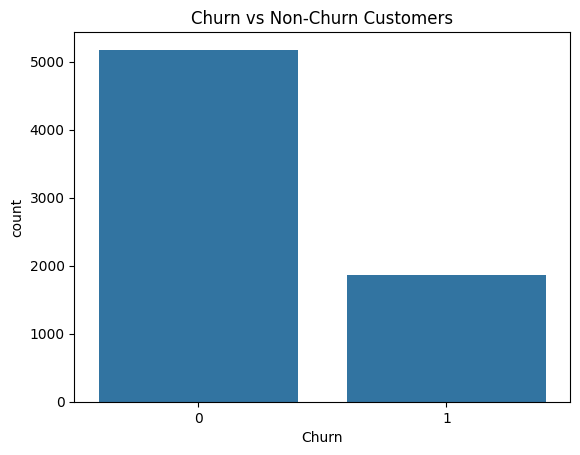

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
plt.title('Churn vs Non-Churn Customers')
plt.show()

In [ ]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate: {churn_rate[1]:.2f}%")

Churn Rate: 26.54%


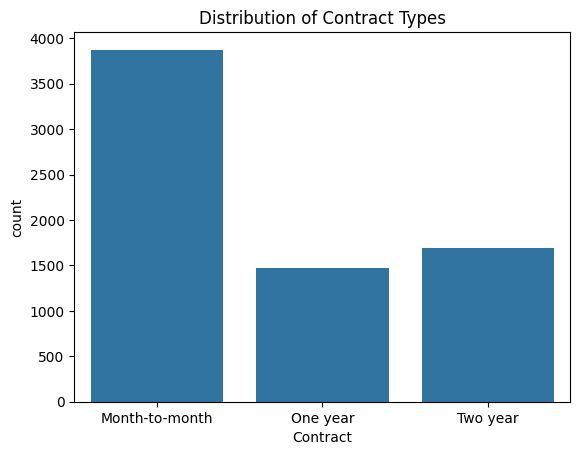

In [ ]:
sns.countplot(x='Contract', data=df)
plt.title('Distribution of Contract Types')
plt.show()

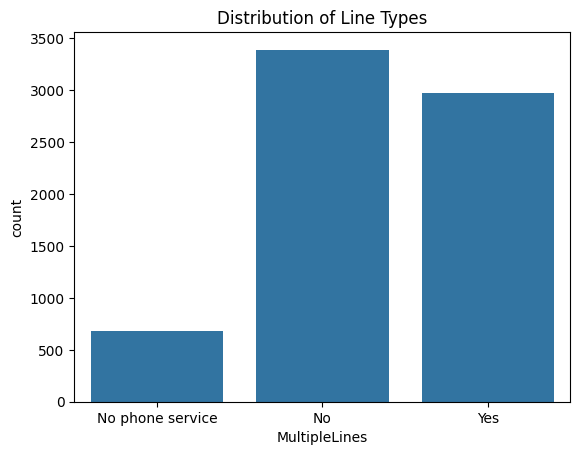

In [ ]:
sns.countplot(x='MultipleLines', data=df)
plt.title('Distribution of Line Types')
plt.show()

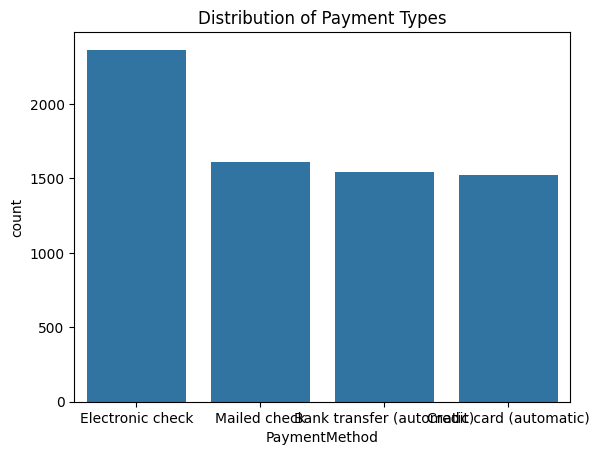

In [ ]:
sns.countplot(x='PaymentMethod', data=df)
plt.title('Distribution of Payment Types')
plt.show()

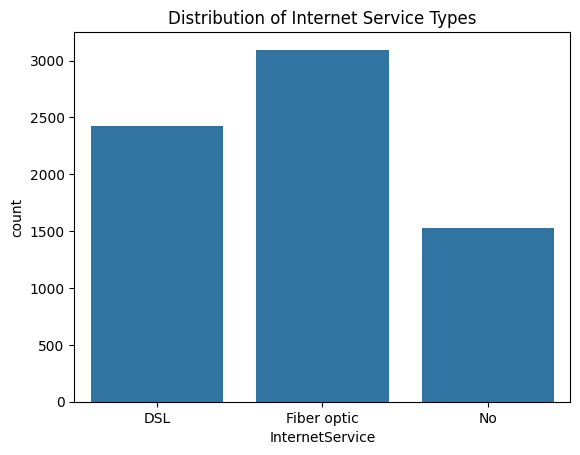

In [ ]:
sns.countplot(x='InternetService', data=df)
plt.title('Distribution of Internet Service Types')
plt.show()

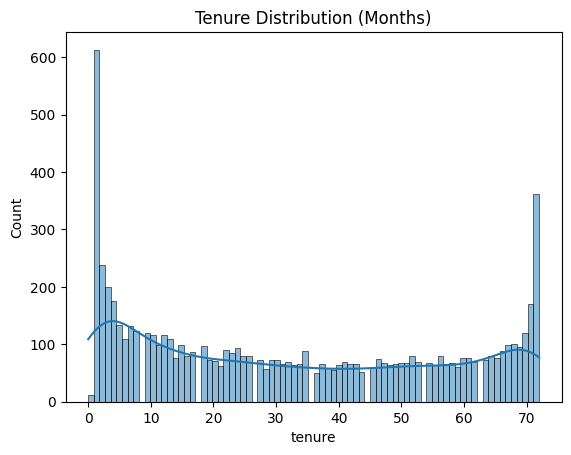

In [ ]:
sns.histplot(df['tenure'], bins=80, kde=True)
plt.title('Tenure Distribution (Months)')
plt.show()

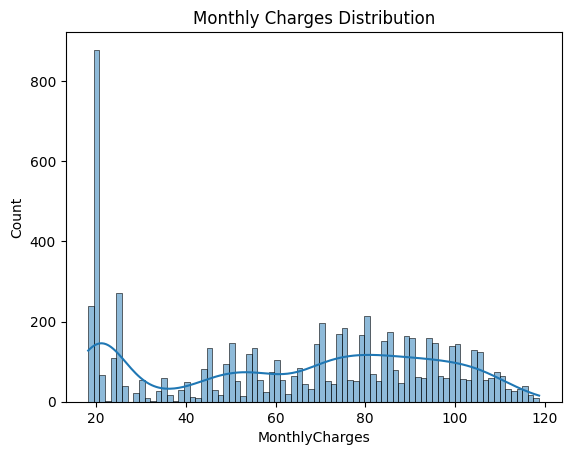

In [ ]:
sns.histplot(df['MonthlyCharges'], bins=80, kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

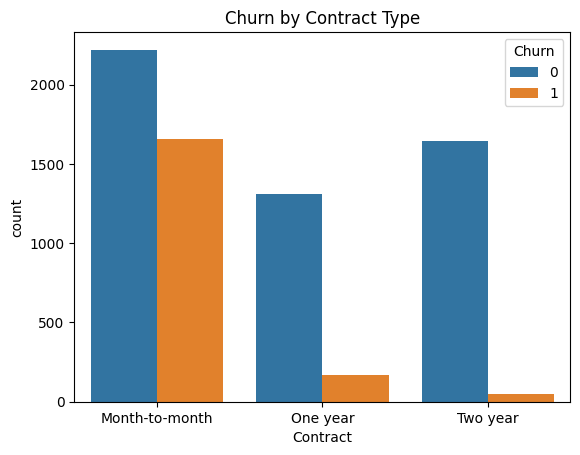

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()A

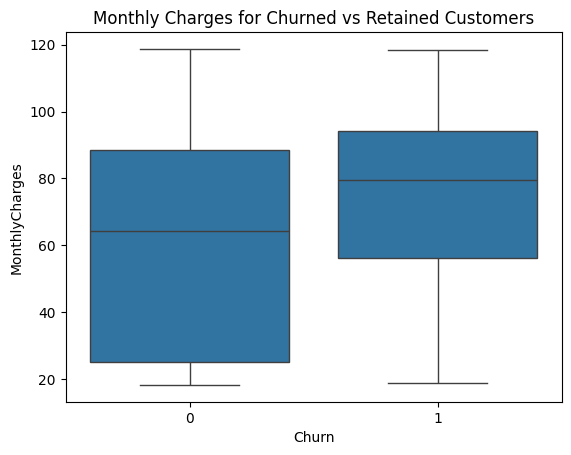

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges for Churned vs Retained Customers')
plt.show()

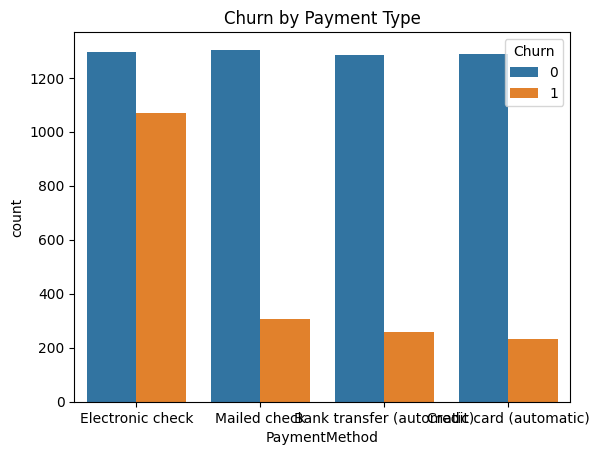

In [ ]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Type')
plt.show()

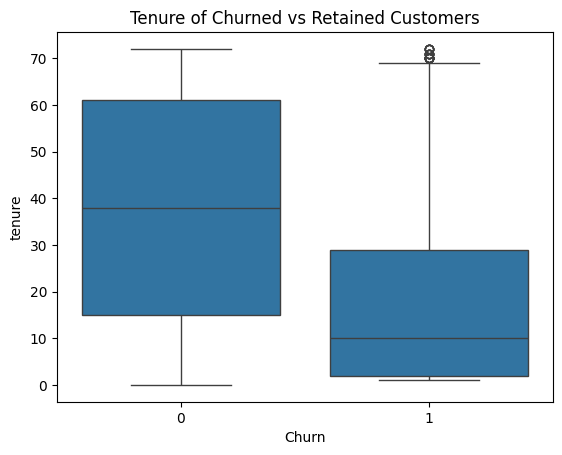

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure of Churned vs Retained Customers')
plt.show()

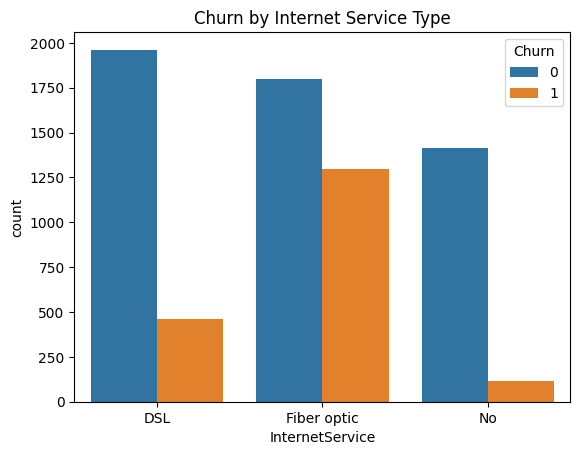

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.show()

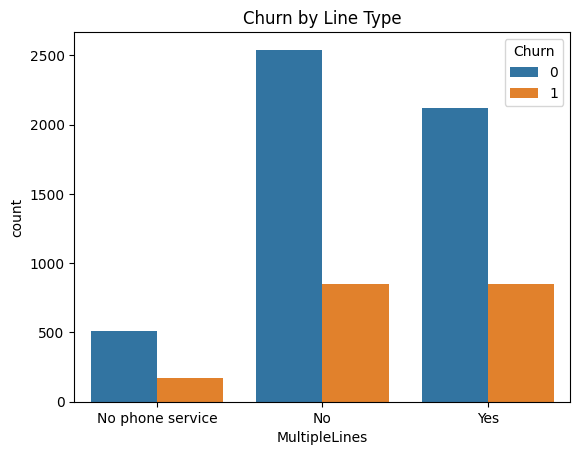

In [ ]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn by Line Type')
plt.show()

<Axes: xlabel='TenureGroup', ylabel='count'>

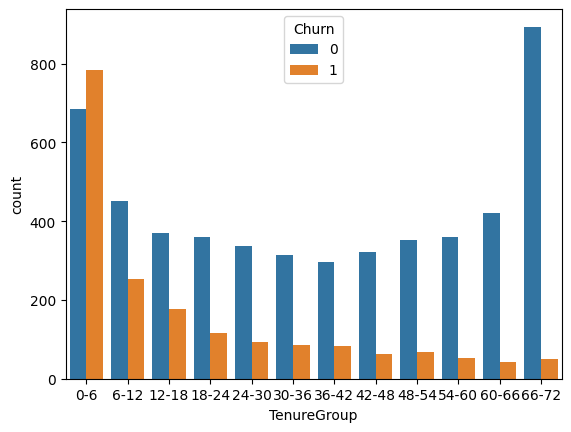

In [ ]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 6,12 ,18,24, 30,36,42,48,54,60,66,72], labels=['0-6', '6-12', '12-18','18-24','24-30','30-36','36-42','42-48','48-54','54-60','60-66','66-72'])
sns.countplot(x='TenureGroup', hue='Churn', data=df)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

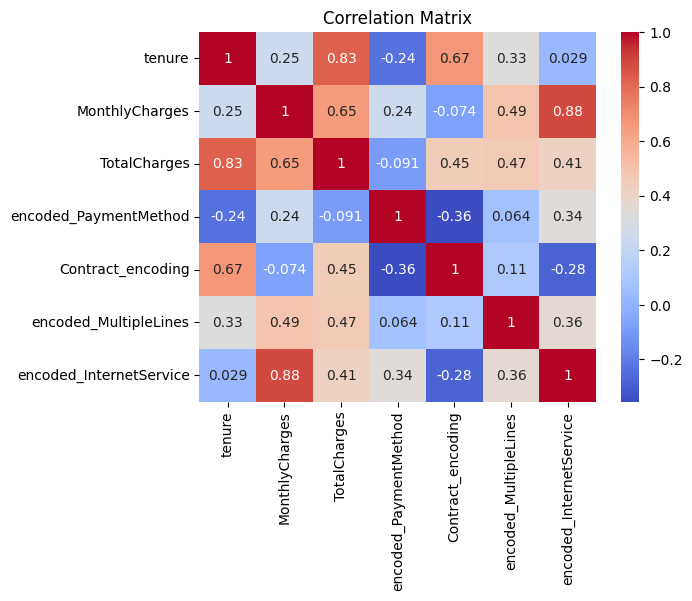

In [ ]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','encoded_PaymentMethod','Contract_encoding','encoded_MultipleLines','encoded_InternetService']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

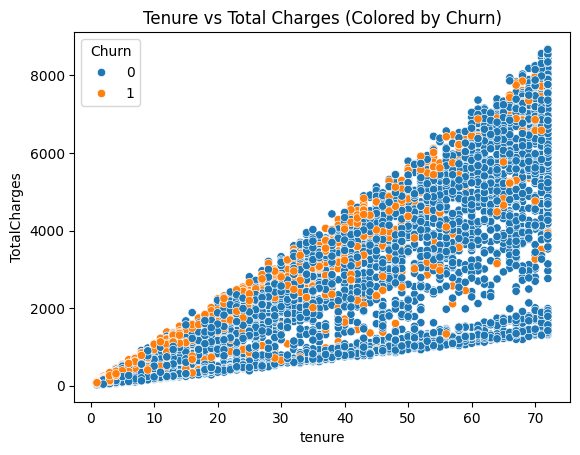

In [ ]:
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Tenure vs Total Charges (Colored by Churn)')
plt.show()

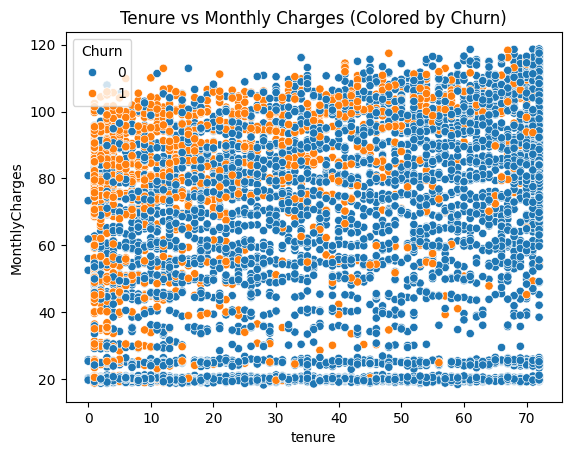

In [ ]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges (Colored by Churn)')
plt.show()

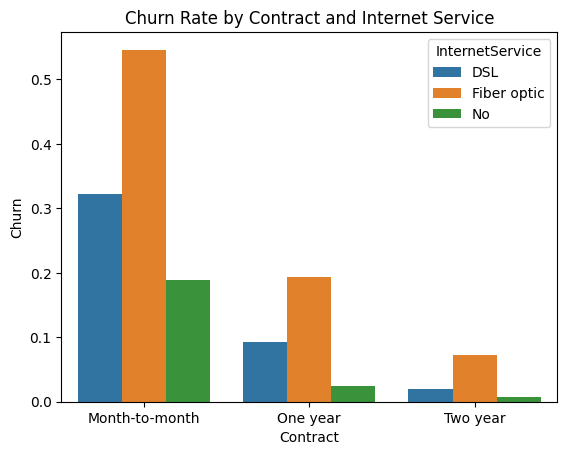

In [ ]:
segment = df.groupby(['Contract', 'InternetService'])['Churn'].mean().reset_index()
sns.barplot(x='Contract', y='Churn', hue='InternetService', data=segment)
plt.title('Churn Rate by Contract and Internet Service')
plt.show()

In [ ]:
df['High_Risk'] = ((df['InternetService']=='No') | (df['InternetService']=='Fiber optic')) & ((df['OnlineSecurity']=='No') | (df['OnlineSecurity']=='No internet service'))
df['TotChargesPerTenure'] = (df['TotalCharges']/df['tenure']+1e-8)
df['MonChargesPerTenure'] = (df['MonthlyCharges']/df['tenure']+1e-8)
df['TenurePerencContract'] = (df['tenure']/df['Contract_encoding'])
df['StreamingServiceFactor'] = (df['StreamingTV']=='No') & (df['StreamingMovies']=='No')
df['OtherServiceFactor'] = (df['encoded_OnlineBackup']*df['encoded_DeviceProtection'])
df['PhService_MulLines'] = (df['PhoneService']==1) & (df['MultipleLines']=='No')
df['ShortTenure_Monthly'] = (df['Contract'] == 'Month-to-month') & (df['tenure'] < 20)
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 60,72], labels=['0', '1', '2', '3','4'])
df['TenurePerDollar'] = df['tenure'] / (df['TotalCharges'] + 1e-6)
df['ChargeRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1e-6)
df['TenureSquared'] = df['tenure'] ** 2
services = ['StreamingTV', 'StreamingMovies', 'OnlineBackup', 'DeviceProtection']
df['NumServices'] = df[services].apply(lambda x: (x == 'Yes').sum(), axis=1)
df['Uses_ElectronicCheck'] = (df['PaymentMethod'] == 'Electronic check')

In [ ]:
df['TenureGroup'] = pd.to_numeric(df['TenureGroup'], errors='coerce')

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,encoded_PaymentMethod,TenureGroup,TotChargesPerTenure,MonChargesPerTenure,TenurePerencContract,OtherServiceFactor,TenurePerDollar,ChargeRatio,TenureSquared,NumServices
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,...,7043.000000,7032.000000,7032.000000,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,...,0.265370,2.226820,64.799424,inf,18.871693,0.081639,0.021819,0.157592,1650.973733,1.461025
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,0.441561,...,0.133951,1.424995,30.185891,NaN,14.187571,0.055156,0.015019,0.281508,1791.773389,1.392868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.152431,0.000000,13.775000,0.268056,0.000000,0.005483,0.008237,0.012604,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,0.000000,...,0.167098,1.000000,36.179891,1.278093,7.000000,0.048450,0.011089,0.018093,81.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,0.191067,3.000000,70.373239,2.150000,18.000000,0.084248,0.014210,0.034684,841.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,...,0.452854,3.000000,90.179560,6.641190,24.500000,0.156232,0.027640,0.113660,3025.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,0.452854,4.000000,121.400000,inf,72.000000,0.156232,0.072595,1.000000,5184.000000,4.000000


In [ ]:
df.to_csv('telco_CLND_FE.csv',index=False)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Split data
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
scaler = StandardScaler()
X_train[categorical_features] = enc.fit_transform(X_train[categorical_features])
X_test[categorical_features] = enc.transform(X_test[categorical_features])

X_train[numerical_features] = X_train[numerical_features].replace([np.inf, -np.inf], np.nan)
X_train[numerical_features] = X_train[numerical_features].fillna(X_train[numerical_features].mean())

X_test[numerical_features] = X_test[numerical_features].replace([np.inf, -np.inf], np.nan)
X_test[numerical_features] = X_test[numerical_features].fillna(X_train[numerical_features].mean())
for col in numerical_features:
    upper_bound = X_train[col].mean() + 3 * X_train[col].std()
    lower_bound = X_train[col].mean() - 3 * X_train[col].std()
    X_train[col] = np.clip(X_train[col], lower_bound, upper_bound)
    X_test[col] = np.clip(X_test[col], lower_bound, upper_bound)

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:

scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

n_splits = 7
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
auc_scores, f1_scores, acc_scores = [], [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):

    X_train_fold = X_train.iloc[train_idx].copy()
    X_val_fold = X_train.iloc[val_idx].copy()
    y_train_fold = y_train.iloc[train_idx]
    y_val_fold = y_train.iloc[val_idx]
    for col in numerical_features:

      X_train_fold[col] = X_train_fold[col].replace([np.inf, -np.inf], np.nan).fillna(X_train_fold[col].mean())
      X_val_fold[col] = X_val_fold[col].replace([np.inf, -np.inf], np.nan).fillna(X_val_fold[col].mean())


      upper_bound = X_train[col].mean() + 3 * X_train[col].std()
      lower_bound = X_train[col].mean() - 3 * X_train[col].std()
      X_train[col] = np.clip(X_train[col], lower_bound, upper_bound)
      X_test[col] = np.clip(X_test[col], lower_bound, upper_bound)



    model = XGBClassifier(
        objective='binary:logistic',
        n_estimators=800,
        max_depth=6,
        learning_rate=0.01,
        subsample=0.6,
        colsample_bytree=0.8,
        scale_pos_weight=np.sum(y_train_fold == 0) / np.sum(y_train_fold == 1),
        eval_metric='aucpr',
        random_state=42
    )
    model.fit(X_train_fold, y_train_fold)

    y_proba = model.predict_proba(X_val_fold)[:, 1]
    y_pred = (y_proba > 0.5).astype(int)

    auc_scores.append(roc_auc_score(y_val_fold, y_proba))
    f1_scores.append(f1_score(y_val_fold, y_pred))
    acc_scores.append(accuracy_score(y_val_fold,y_pred))

    print(f"Fold {fold}: AUC = {auc_scores[-1]:.4f}, F1 = {f1_scores[-1]:.4f}")


print(f"\nMean AUC: {np.mean(auc_scores):.4f} (±{np.std(auc_scores):.4f})")
print(f"Mean F1: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")
print(f"Mean Accuracy: {np.mean(acc_scores):.4f} (±{np.std(acc_scores):.4f})")

Fold 1: AUC = 0.8459, F1 = 0.6408
Fold 2: AUC = 0.8253, F1 = 0.5939
Fold 3: AUC = 0.8320, F1 = 0.6154
Fold 4: AUC = 0.8434, F1 = 0.6151
Fold 5: AUC = 0.8474, F1 = 0.6481
Fold 6: AUC = 0.8378, F1 = 0.6172
Fold 7: AUC = 0.8690, F1 = 0.6613

Mean AUC: 0.8430 (±0.0129)
Mean F1: 0.6274 (±0.0216)
Mean Accuracy: 0.7684 (±0.0130)


In [ ]:

from sklearn.preprocessing import OrdinalEncoder

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
enc = OrdinalEncoder()
X_train[categorical_features] = enc.fit_transform(X_train[categorical_features])
X_test[categorical_features] = enc.transform(X_test[categorical_features])

lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=600,
    max_depth=4,
    learning_rate=0.01,
    subsample=0.4,
    colsample_bytree=0.4,
    is_unbalance=True,
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]

print("\nLightGBM Results:")
print(f"Accuracy: {accuracy_score(y_test, lgb_preds):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, lgb_probs):.4f}")
print(f"F1-Score: {f1_score(y_test, lgb_preds):.4f}")
print(confusion_matrix(y_test, lgb_preds))

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1936
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression

xgb_proba = model.predict_proba(X_test)[:, 1]
lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

weights = [0.03298984207900025+0.22659117738662077,0.74041898053437898]
ensemble_proba = (weights[0]*xgb_proba + weights[1]*lgb_proba)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, ensemble_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]

y_pred_optimized = (ensemble_proba >= best_threshold).astype(int)

print(f"Custom Ensemble ROC-AUC: {roc_auc_score(y_test, ensemble_proba):.4f}")
print(f"Custom Ensemble F1: {f1_score(y_test, y_pred_optimized):.4f}")

Custom Ensemble ROC-AUC: 0.8439
Custom Ensemble F1: 0.6328
